In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
wine = pd.read_csv("C:/Users/Anusha/Desktop/bharatintern/winequality-red.csv")

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine.shape

(1599, 12)

In [8]:
#quality check
round(100*(wine.isnull().sum()/len(wine)),2).sort_values(ascending=False)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [9]:
round(100*(wine.isnull().sum(axis=1)/len(wine)),2).sort_values(ascending=False)

0       0.0
1074    0.0
1072    0.0
1071    0.0
1070    0.0
       ... 
530     0.0
529     0.0
528     0.0
527     0.0
1598    0.0
Length: 1599, dtype: float64

In [10]:
#No missing / Null value in either rows or columns
dub_wine=wine.copy()
dub_wine.drop_duplicates(subset=None,inplace=True)

In [11]:
dub_wine.shape

(1359, 12)

In [12]:
wine.shape

(1599, 12)

In [13]:
#Assign non duplicate data to original data
wine=dub_wine

In [14]:
for col in wine:
    print(wine[col].value_counts(ascending=False), '\n\n\n')


fixed acidity
7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
13.8     1
13.4     1
4.7      1
15.0     1
5.5      1
Name: count, Length: 96, dtype: int64 



volatile acidity
0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: count, Length: 143, dtype: int64 



citric acid
0.00    118
0.49     59
0.24     41
0.02     38
0.08     32
       ... 
0.72      1
0.62      1
0.71      1
0.79      1
0.78      1
Name: count, Length: 80, dtype: int64 



residual sugar
2.00     133
2.20     110
1.80     108
2.10     104
1.90      97
        ... 
2.25       1
2.95       1
2.85       1
3.45       1
13.90      1
Name: count, Length: 91, dtype: int64 



chlorides
0.080    50
0.078    44
0.074    43
0.084    40
0.076    39
         ..
0.360     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: count, Length: 153, dtype: int64 



free sulfur dioxide
6.0     121
5.0      88
15.0     65
12.0

In [15]:
#data split
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(wine,train_size=0.7,test_size=0.3,random_state=100)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 31 to 926
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         951 non-null    float64
 1   volatile acidity      951 non-null    float64
 2   citric acid           951 non-null    float64
 3   residual sugar        951 non-null    float64
 4   chlorides             951 non-null    float64
 5   free sulfur dioxide   951 non-null    float64
 6   total sulfur dioxide  951 non-null    float64
 7   density               951 non-null    float64
 8   pH                    951 non-null    float64
 9   sulphates             951 non-null    float64
 10  alcohol               951 non-null    float64
 11  quality               951 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 96.6 KB


In [17]:
df_train.shape

(951, 12)

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 1573 to 677
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         408 non-null    float64
 1   volatile acidity      408 non-null    float64
 2   citric acid           408 non-null    float64
 3   residual sugar        408 non-null    float64
 4   chlorides             408 non-null    float64
 5   free sulfur dioxide   408 non-null    float64
 6   total sulfur dioxide  408 non-null    float64
 7   density               408 non-null    float64
 8   pH                    408 non-null    float64
 9   sulphates             408 non-null    float64
 10  alcohol               408 non-null    float64
 11  quality               408 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 41.4 KB


In [19]:
df_train.shape

(951, 12)

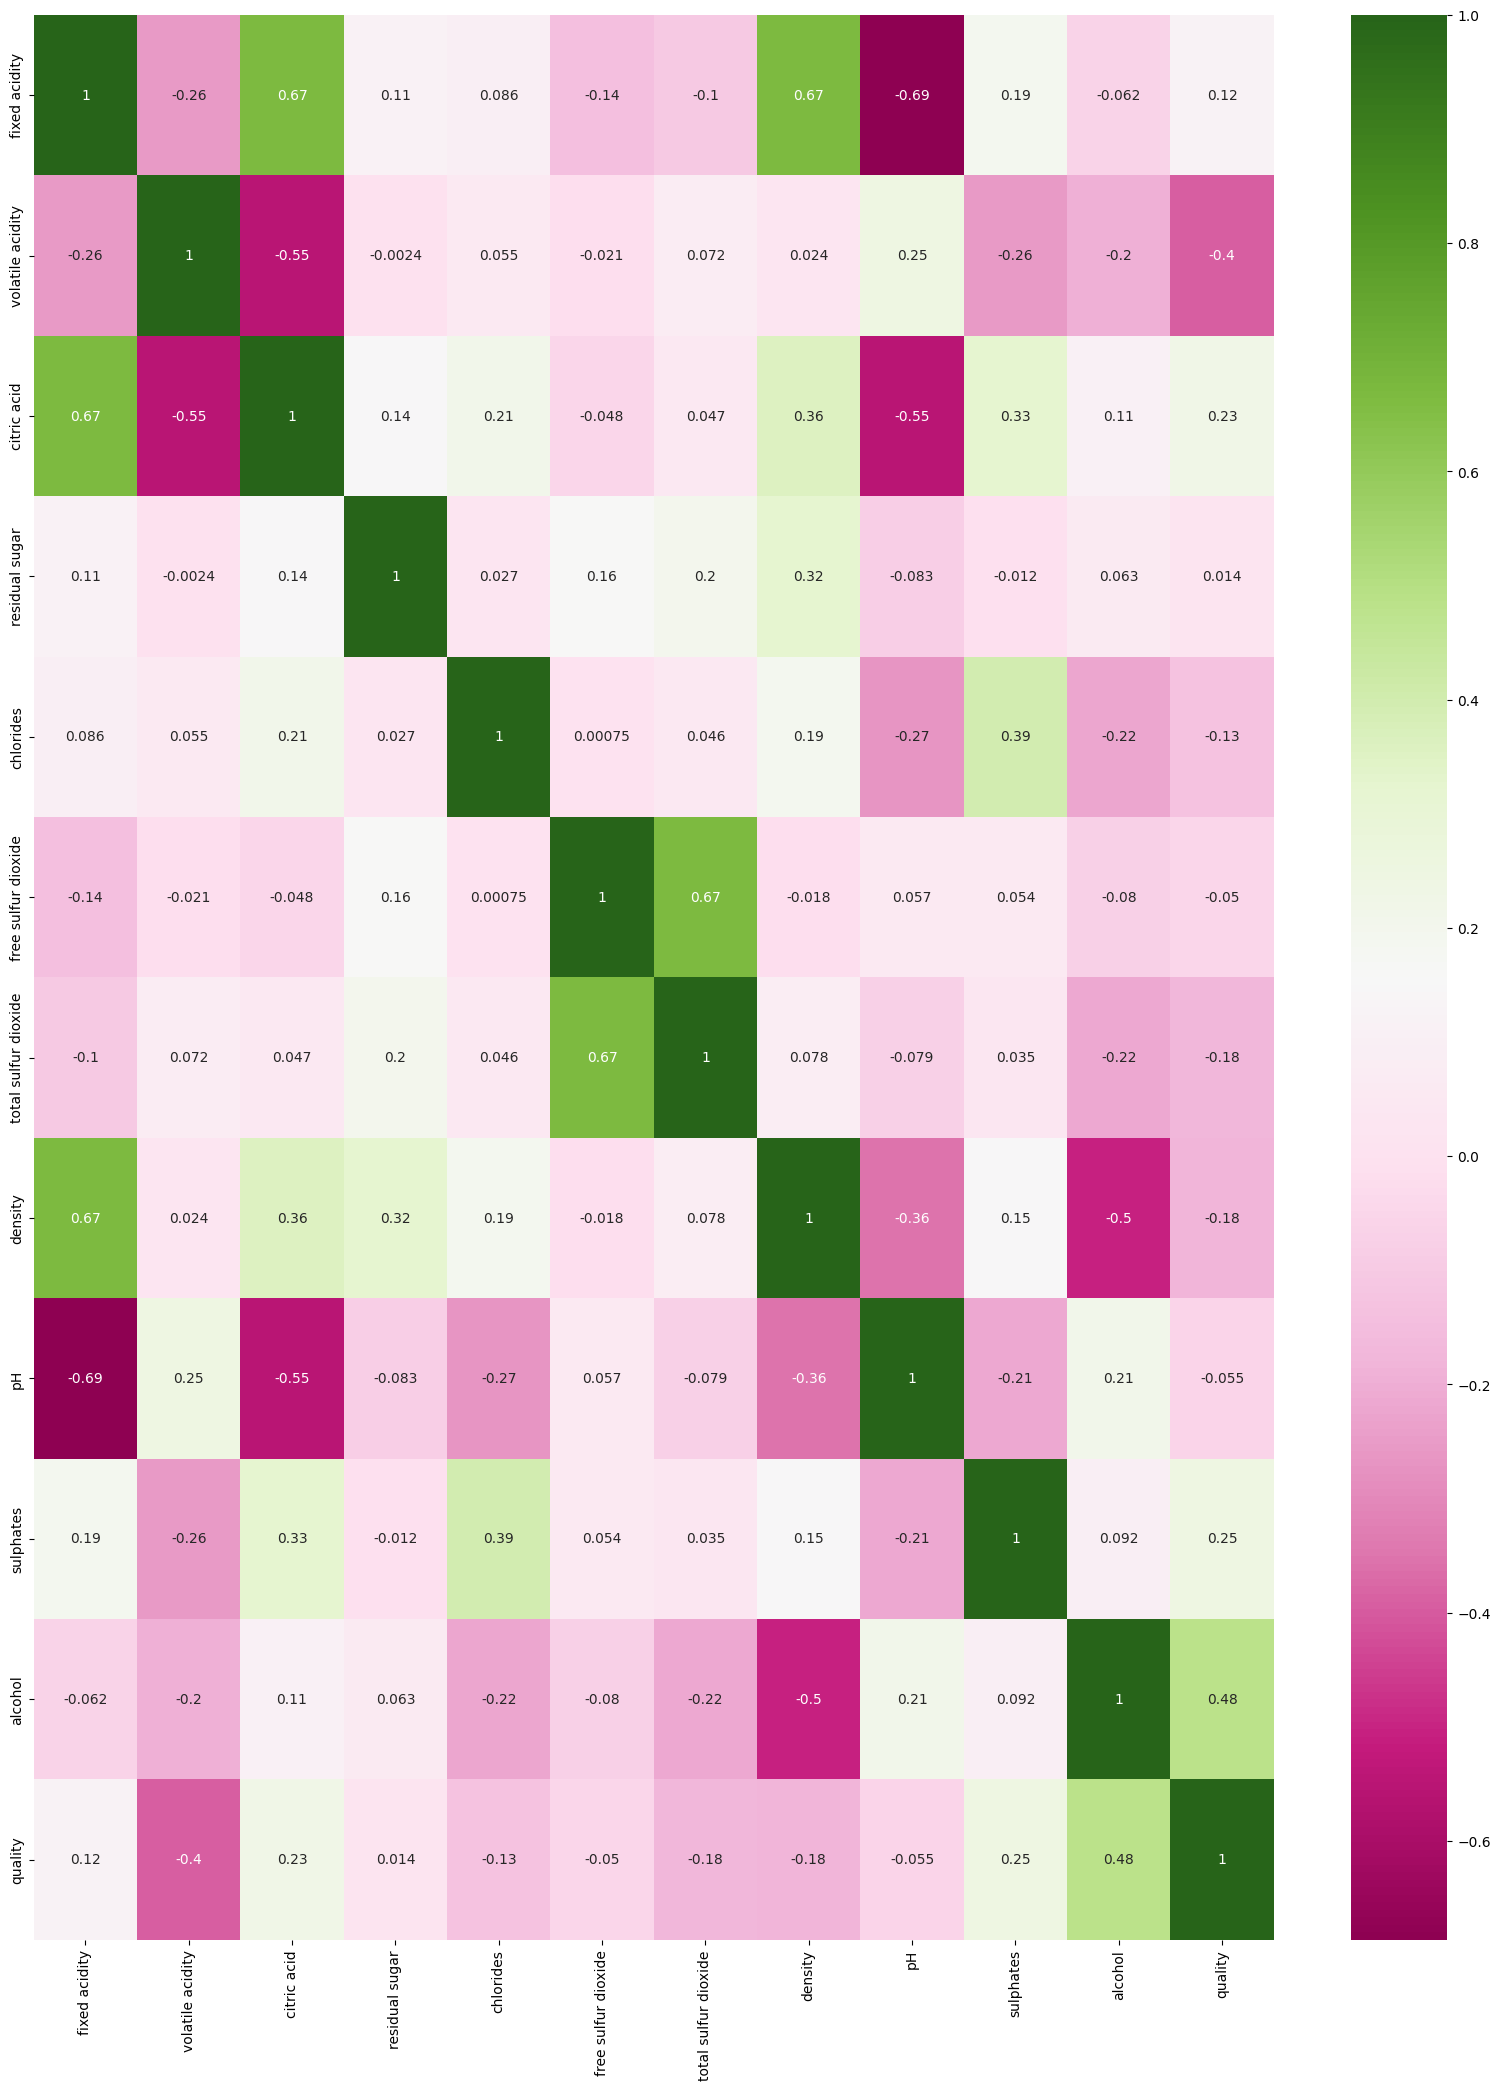

In [20]:
plt.figure(figsize=(20,25))
sns.heatmap(wine.corr(), annot=True,cmap='PiYG')
plt.show()

In [21]:
#rescaling
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler=MinMaxScaler()

In [23]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6
371,7.9,0.240,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6
952,8.2,0.310,0.40,2.2,0.058,6.0,10.0,0.99536,3.31,0.68,11.2,7
1037,7.3,0.910,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,5
1398,7.0,0.600,0.12,2.2,0.083,13.0,28.0,0.99660,3.52,0.62,10.2,7


In [24]:
df_train[:]=scaler.fit_transform(df_train[:])

In [25]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,0.196429,0.369718,0.00,0.123077,0.155259,0.313433,0.109541,0.497334,0.620690,0.143713,0.338462,0.6
371,0.285714,0.056338,0.40,0.053846,0.073456,0.149254,0.067138,0.504950,0.500000,0.323353,0.046154,0.6
952,0.312500,0.105634,0.40,0.100000,0.076795,0.074627,0.014134,0.402894,0.491379,0.209581,0.430769,0.8
1037,0.232143,0.528169,0.10,0.069231,0.103506,0.283582,0.176678,0.506474,0.525862,0.137725,0.123077,0.4
1398,0.205357,0.309859,0.12,0.100000,0.118531,0.179104,0.077739,0.497334,0.672414,0.173653,0.276923,0.8


In [26]:
y_train=df_train.pop('quality')
X_train=df_train

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=9)             
rfe = rfe.fit(X_train, y_train)

In [30]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fixed acidity', False, 3),
 ('volatile acidity', True, 1),
 ('citric acid', False, 2),
 ('residual sugar', True, 1),
 ('chlorides', True, 1),
 ('free sulfur dioxide', True, 1),
 ('total sulfur dioxide', True, 1),
 ('density', True, 1),
 ('pH', True, 1),
 ('sulphates', True, 1),
 ('alcohol', True, 1)]

In [31]:
col = X_train.columns[rfe.support_]
col

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['fixed acidity', 'citric acid'], dtype='object')

In [33]:
X_train_rfe = X_train[col]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,pH,12.95
5,density,11.41
7,sulphates,6.36
0,volatile acidity,6.00
3,free sulfur dioxide,5.81
8,alcohol,5.48
4,total sulfur dioxide,4.90
2,chlorides,4.05
1,residual sugar,3.29


In [35]:
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [36]:
lr1.params

const                   0.511514
volatile acidity       -0.293889
residual sugar         -0.023075
chlorides              -0.226907
free sulfur dioxide     0.047656
total sulfur dioxide   -0.170749
density                 0.030913
pH                     -0.103709
sulphates               0.251518
alcohol                 0.400770
dtype: float64

In [37]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     59.68
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           3.04e-86
Time:                        17:50:33   Log-Likelihood:                 598.76
No. Observations:                 951   AIC:                            -1178.
Df Residuals:                     941   BIC:                            -1129.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5115 